# Analisando os Componentes dos Scripts do k Armed Bandits

neste material iremos explorar os componente das implementações do k Armed Bandits

In [3]:
## Imports e Configuração Inicial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# Configuração para reproduzibilidade
np.random.seed(42)

# Configuração de plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

A classe `OneArmedBandit` é um ambiente onde cada vez que se executa o método `pull()` obtemos uma recompensa que segue uma distribuição normal com média igua ao `true_value`e variância `variace`

In [4]:
class OneArmedBandit:
    """
    Implementação simples de um one-armed bandit
    """
    def __init__(self, true_value: float = 0.5, variance: float = 1.0):
        self.true_value = true_value
        self.variance = variance
        
    def pull(self) -> float:
        """Simula puxar a alavanca e retorna uma recompensa"""
        return np.random.normal(self.true_value, self.variance)

Vamos criar uma instância da classe `OneArmedBandit()` com `true_value`= 0.5 e `variance`= 1.0 executar o método `pull()`e observar o resultado

In [7]:
# Cria bandit com valor verdadeiro = 0.5
bandit = OneArmedBandit(true_value=0.5, variance=1.0)
print(bandit.pull())

1.1476885381006925


Agora vamos visualizar a execução de `n_pulls`, para isso vamos armazenar as recompensas obtidas em uma lista e criar uma nova instância da classe `OneArmedBandit()`

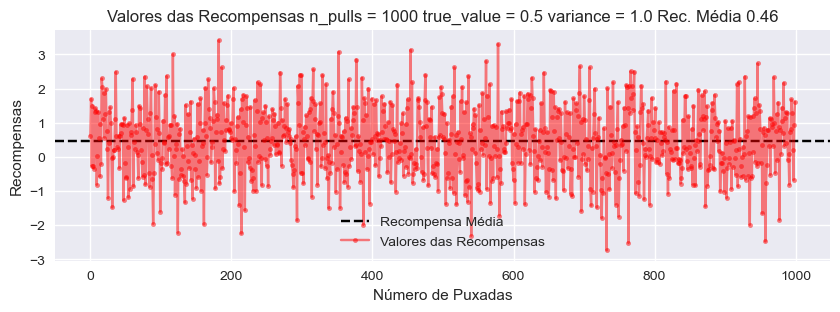

In [9]:
# Visualização
plt.figure(figsize=(10, 3))

n_pulls = 1000
rewards = []
bandit = OneArmedBandit(true_value=0.5, variance=1.0)
for i in range(n_pulls):
    rewards.append(bandit.pull())
plt.axhline(y=np.mean(rewards),color="black", linestyle="--", label='Recompensa Média')
plt.plot(rewards, color="red", linestyle="-", marker='.', alpha=0.5, label='Valores das Recompensas')
plt.xlabel('Número de Puxadas')
plt.ylabel('Recompensas')
tit1 = f'Valores das Recompensas n_pulls = {n_pulls} true_value = {bandit.true_value}'
tit2 = f'variance = {bandit.variance} Rec. Média {np.round(np.mean(rewards),2)}'
plt.title(tit1 + ' ' + tit2)
plt.legend()
plt.show()

Vamos visualizar um histogrma da lista de `rewards`obtida na célula anterior

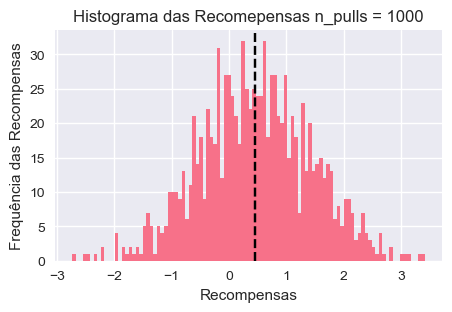

In [11]:
plt.figure(figsize=(5, 3))
plt.hist(rewards, bins=100, label='Recompensas');
plt.axvline(x=np.mean(rewards),color="black", linestyle="--", label='Média das Recompensas')
plt.title(f'Histograma das Recomepensas n_pulls = {n_pulls}')
plt.ylabel('Frequência das Recompensas')
plt.xlabel('Recompensas')
plt.show()

Agora vamos observar a convergência a cada `pull()` teremos uma atualização da média cumulativa `cumulative+average`, é encontrada dividindo a soma das recompensas `total_reward`pelo total da pulls `i`

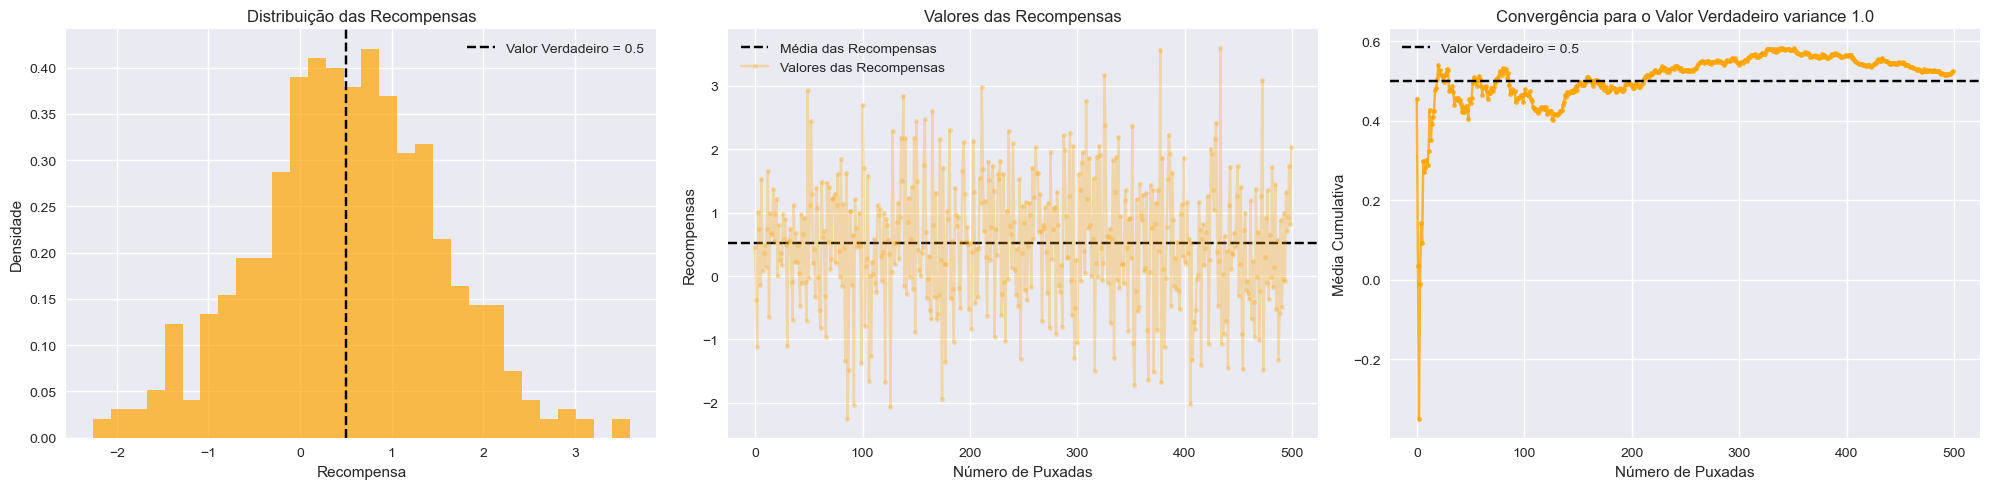

In [24]:
total_reward = 0
n_pulls = 500
rewards = []
cumulative_average = []

bandit = OneArmedBandit(true_value=0.5, variance=1.0)

for i in range(n_pulls):
    reward = bandit.pull()
    rewards.append(reward)
    total_reward += reward
    cumulative_average.append(total_reward / (i + 1))
    
# Visualização
plt.figure(figsize=(20, 5))

color='orange'

plt.subplot(1, 3, 1)
plt.hist(rewards, bins=30, alpha=0.7, density=True, color=color)
plt.axvline(bandit.true_value, color='k', linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_value}')
plt.xlabel('Recompensa')
plt.ylabel('Densidade')
plt.title('Distribuição das Recompensas')
plt.legend()

plt.subplot(1, 3, 2)
plt.axhline(y=np.mean(rewards),color="black", linestyle="--", label = 'Média das Recompensas')
plt.plot(rewards, color=color, linestyle="-", marker='.', alpha=0.3, label = 'Valores das Recompensas')
plt.xlabel('Número de Puxadas')
plt.ylabel('Recompensas')
plt.title('Valores das Recompensas')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(cumulative_average, alpha=0.8, linestyle="-", marker='.', color=color)
plt.axhline(bandit.true_value, color='k', linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_value}')
plt.xlabel('Número de Puxadas')
plt.ylabel('Média Cumulativa')
plt.title(f'Convergência para o Valor Verdadeiro variance {bandit.variance}')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
class TwoArmedBandit:
    """
    Two-armed bandit com duas ações possíveis
    """
    def __init__(self, true_values: List[float] = [0.8, 0.2], variance: float = 1.0):
        self.true_values = np.array(true_values)
        self.variance = variance
        self.k = len(true_values)
        
    def pull(self, action: int) -> float:
        """Puxa a alavanca da ação especificada"""
        if action < 0 or action >= self.k:
            raise ValueError(f"Ação deve estar entre 0 e {self.k-1}")
        return np.random.normal(self.true_values[action], self.variance)
    
    def get_optimal_action(self) -> int:
        """Retorna a ação com maior valor verdadeiro"""
        return np.argmax(self.true_values)

In [ ]:
true_values = [0.8, 0.2]  # Ação 1 é melhor
bandit = TwoArmedBandit(true_values)

In [ ]:
print(bandit.get_optimal_action())
print(bandit.pull(0))
print(bandit.pull(1))

In [ ]:
n_pulls = 1000
reward_1 = []
reward_0 = []
for i in range(n_pulls):
    reward_0.append(bandit.pull(action=0))
    reward_1.append(bandit.pull(action=1))

# Visualização
plt.figure(figsize=(20, 5))
    
plt.axhline(y=np.mean(reward_1),color="red", linestyle="--", 
            label = 'Média das Recompensas k=1')
plt.plot(reward_1, color='red', linestyle="-", marker='.', alpha=0.3, 
         label = 'Valores das Recompensas k=1')

plt.axhline(y=np.mean(reward_0),color="blue", linestyle="--", label = 'Média das Recompensas k=0')
plt.plot(reward_0, color='blue', linestyle="-", marker='.', alpha=0.3, label = 'Valores das Recompensas k=0')

plt.xlabel('Número de Puxadas')
plt.ylabel('Recompensas')
plt.title('Valores das Recompensas')
plt.legend()
plt.show()

In [ ]:
plt.hist(reward_0, bins=30, alpha=0.3, density=True, color='blue', label='Recompensas Ação 0')
plt.axvline(x=np.mean(reward_0),color="blue", linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_values[0]}')
plt.hist(reward_1, bins=30, alpha=0.3, density=True, color='red', label='Recompensas Ação 1')
plt.axvline(x=np.mean(reward_1),color="red", linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_values[1]}')
plt.xlabel('Recompensa')
plt.ylabel('Densidade')
plt.title('Distribuição das Recompensas')
plt.legend()
plt.show()

In [ ]:
true_values = [3.8, -3.2]  # Ação 1 é melhor
bandit = TwoArmedBandit(true_values)

In [ ]:
n_pulls = 1000
reward_1 = []
reward_0 = []
for i in range(n_pulls):
    reward_0.append(bandit.pull(action=0))
    reward_1.append(bandit.pull(action=1))

# Visualização
plt.figure(figsize=(20, 5))
    
plt.axhline(y=np.mean(reward_1),color="red", linestyle="--", label = 'Média das Recompensas k=1')
plt.plot(reward_1, color='red', linestyle="-", marker='.', alpha=0.3, label = 'Valores das Recompensas k=1')

plt.axhline(y=np.mean(reward_0),color="blue", linestyle="--", label = 'Média das Recompensas k=0')
plt.plot(reward_0, color='blue', linestyle="-", marker='.', alpha=0.3, label = 'Valores das Recompensas k=0')

plt.xlabel('Número de Puxadas')
plt.ylabel('Recompensas')
plt.title('Valores das Recompensas')
plt.legend()
plt.show()

In [ ]:
plt.hist(reward_0, bins=30, alpha=0.3, density=True, color='blue', label='Recompensas Ação 0')
plt.axvline(x=np.mean(reward_0),color="blue", linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_values[0]}')
plt.hist(reward_1, bins=30, alpha=0.3, density=True, color='red', label='Recompensas Ação 1')
plt.axvline(x=np.mean(reward_1),color="red", linestyle='--', 
            label=f'Valor Verdadeiro = {bandit.true_values[1]}')
plt.xlabel('Recompensa')
plt.ylabel('Densidade')
plt.title('Distribuição das Recompensas')
plt.legend()
plt.show()

In [ ]:
### Implementação do 10-Armed Testbed

class TenArmedBandit:
    """
    10-armed bandit seguindo especificação do Sutton & Barto
    """
    def __init__(self, variance: float = 1.0, seed: int = None):
        if seed is not None:
            np.random.seed(seed)
        
        # Valores verdadeiros q*(a) ~ N(0, 1)
        self.true_values = np.random.normal(0, 1, 10)
        self.variance = variance
        self.k = 10
        
    def pull(self, action: int) -> float:
        """Gera recompensa R ~ N(q*(a), variance)"""
        return np.random.normal(self.true_values[action], self.variance)
    
    def get_optimal_action(self) -> int:
        return np.argmax(self.true_values)
    
    def get_optimal_value(self) -> float:
        return np.max(self.true_values)

In [ ]:
np.random.normal(0, 1, 10)

In [ ]:
bandit =TenArmedBandit(seed=42)
bandit.true_values = np.random.normal(0, 1, 10)

In [ ]:
pulls_0 = []
pulls_1 = []
pulls_2 = []
pulls_3 = []
pulls_4 = []
pulls_5 = []
pulls_6 = []
pulls_7 = []
pulls_8 = []
pulls_9 = []
for i in range(1000):
    pulls_0.append(bandit.pull(action=0))
    pulls_1.append(bandit.pull(action=1))
    pulls_2.append(bandit.pull(action=2))
    pulls_3.append(bandit.pull(action=3))
    pulls_4.append(bandit.pull(action=4))
    pulls_5.append(bandit.pull(action=5))
    pulls_6.append(bandit.pull(action=6))
    pulls_7.append(bandit.pull(action=7))
    pulls_8.append(bandit.pull(action=8))
    pulls_9.append(bandit.pull(action=9))

# Visualização

fig, axs = plt.subplots(10, 2, 
                        #sharex=True, 
                        #sharey=True,
                        figsize=(20, 20)
                       )

axs[0,0].plot(pulls_0, '.-')
axs[0,0].axhline(y=0.0,color="black", linestyle='--')
axs[0,1].hist(pulls_0, bins=100)
axs[0,1].axvline(x=0.0,color="black", linestyle='--')
axs[1,0].plot(pulls_1, '.-')
axs[1,0].axhline(y=0.0,color="black", linestyle='--')
axs[1,1].hist(pulls_1, bins=100)
axs[1,1].axvline(x=0.0,color="black", linestyle='--')
axs[2,0].plot(pulls_2, '.-')
axs[2,0].axhline(y=0.0,color="black", linestyle='--')
axs[2,1].hist(pulls_2, bins=100)
axs[2,1].axvline(x=0.0,color="black", linestyle='--')
axs[3,0].plot(pulls_3, '.-')
axs[3,0].axhline(y=0.0,color="black", linestyle='--')
axs[3,1].hist(pulls_3, bins=100)
axs[3,1].axvline(x=0.0,color="black", linestyle='--')
axs[4,0].plot(pulls_4, '.-')
axs[4,0].axhline(y=0.0,color="black", linestyle='--')
axs[4,1].hist(pulls_4, bins=100)
axs[4,1].axvline(x=0.0,color="black", linestyle='--')
axs[5,0].plot(pulls_5, '.-')
axs[5,0].axhline(y=0.0,color="black", linestyle='--')
axs[5,1].hist(pulls_5, bins=100)
axs[5,1].axvline(x=0.0,color="black", linestyle='--')
axs[6,0].plot(pulls_6, '.-')
axs[6,0].axhline(y=0.0,color="black", linestyle='--')
axs[6,1].hist(pulls_6, bins=100)
axs[6,1].axvline(x=0.0,color="black", linestyle='--')
axs[7,0].plot(pulls_7, '.-')
axs[7,0].axhline(y=0.0,color="black", linestyle='--')
axs[7,1].hist(pulls_7, bins=100)
axs[7,1].axvline(x=0.0,color="black", linestyle='--')
axs[8,0].plot(pulls_8, '.-')
axs[8,0].axhline(y=0.0,color="black", linestyle='--')
axs[8,1].hist(pulls_8, bins=100)
axs[8,1].axvline(x=0.0,color="black", linestyle='--')
axs[9,0].plot(pulls_9, '.-')
axs[9,0].axhline(y=0.0,color="black", linestyle='--')
axs[9,1].hist(pulls_9, bins=100)
axs[9,1].axvline(x=0.0,color="black", linestyle='--')
plt.show()

In [ ]:
bandit.true_values

In [ ]:
pd.DataFrame([pulls_0,pulls_1,pulls_2,pulls_3,pulls_4,pulls_5,pulls_6,pulls_7,pulls_8,pulls_9]).T.plot.box()